In [1]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Layer
from tensorflow.keras.layers import Embedding, Input, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Sequential, Model
from keras.layers import LSTM, Flatten, Conv1D, MaxPool1D, Bidirectional, Embedding, SpatialDropout1D, Attention, BatchNormalization, GlobalMaxPool1D, GRU, SimpleRNN, ConvLSTM1D
import numpy as np
import pandas as pd
import keras.backend as K
from keras.layers import *
from keras.models import *

In [2]:
df = pd.read_csv("/content/drive/MyDrive/STT3795/Projet/Data/emotion.csv", encoding='latin-1', header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
label_sentiment_dict = {0: "Negative", 4: "Positive"}
def label_map(a):
  return label_sentiment_dict[a]

df[0] = df[0].apply(label_map)

In [5]:
df.head()

,0,1,2,3,4,5
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
import re
import string
def cleaning(a):
    a = str(a).lower()
    a = re.sub('\[.*?\]', '', a)
    a = re.sub('[%s]' % re.escape(string.punctuation), '', a)
    a = re.sub('\n', '', a)
    a = re.sub('https?://\S+|www\.\S+', '', a)
    a = re.sub('<.*?>+', '', a)
    a = re.sub('\w*\d\w*', '', a)
    return a

df[5] = df[5].apply(cleaning)

In [7]:
maxlength = 30     #max length for each 

x_train = df[5].to_numpy()
y_train = df[0].to_numpy()

In [8]:
import re
import string
from tqdm import tqdm


# https://www.datacamp.com/tutorial/stemming-lemmatization-python 
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

porter=PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

for i in tqdm(range(len(x_train))):
  x_train[i] = stemSentence(x_train[i])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
100%|██████████| 1600000/1600000 [07:14<00:00, 3680.30it/s]


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.05, random_state=22)

Vectorize

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
vectorizer = TfidfVectorizer()

In [13]:
X_train_vect = vectorizer.fit_transform(X_train).astype('float16')

In [14]:
X_test_vect = vectorizer.transform(X_test).astype('float16')

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [18]:
input_dim = X_train_vect.shape[1]  # Number of features

model3 = Sequential()
model3.add(Dense(64, input_dim=input_dim, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(2, activation='softmax'))

In [19]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [20]:
history3 = model3.fit(X_train_vect, y_train, 
                    batch_size=1024, epochs=2, 
                   )

Epoch 1/2
1485/1485 [==============================] - 79s 48ms/step - loss: 0.4478 - accuracy: 0.7905
Epoch 2/2
1485/1485 [==============================] - 31s 20ms/step - loss: 0.3395 - accuracy: 0.8501


In [25]:
def plot_history(history):
    import matplotlib.pyplot as plt
    acc = history.history['accuracy']
    # val_acc = history.history['val_acc']
    loss = history.history['loss']
    # val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Train accuracy')
    # plt.plot(x, val_acc, 'r', label='Val accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Train loss')
    # plt.plot(x, val_loss, 'r', label='Val loss')
    plt.title('Training and validation loss')
    plt.legend()

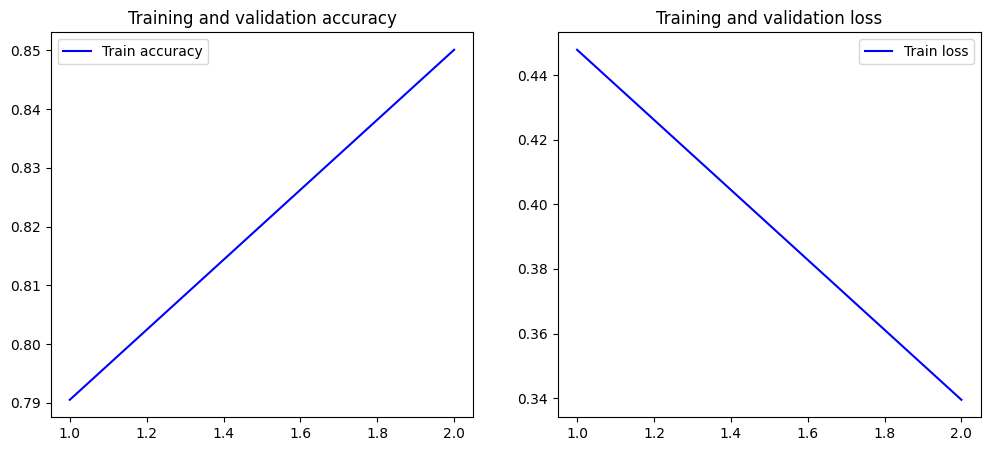

In [26]:
plot_history(history3)

In [27]:
preds3 = model3.predict(X_test_vect)

2500/2500 [==============================] - 5s 2ms/step


In [28]:
classes3 = np.argmax(preds3, axis=1)

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, classes3))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     39896
           1       0.80      0.79      0.80     40104

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000

